In [1]:
%run 'Functions.ipynb'

/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


### 1. Initial training

In [2]:
chunk='S5'

In [3]:
data, labels, unique_mutations, aa_seq = read_data(chunk)

In [4]:
model = Sequential()

init = initializers.Orthogonal(gain=1.0, seed=None)

model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
model.add(Dense(10, activation='sigmoid', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer=opt,
              loss='mean_squared_error',
              verbose=0)

hist = model.fit(data, labels, epochs=200, batch_size=400, shuffle=True, verbose=0)
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

proba = model.predict_proba(data, batch_size=100, verbose=0)

true1 = labels
predicted1 = proba.flatten()
fitness_potential1 = data.dot(weights) + biases[0]

/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:2096: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


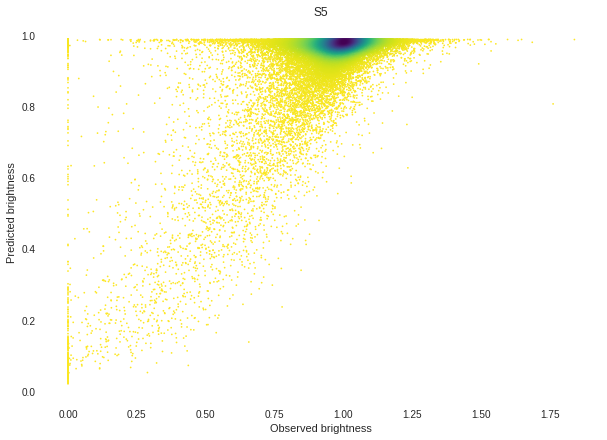

In [5]:
plt.figure(figsize = [10,7])
density_plot(true1, predicted1, chunk)

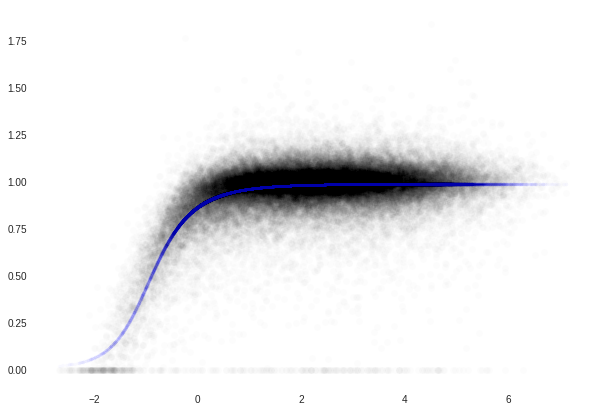

In [6]:
plt.figure(figsize = [10,7])
plt.plot(fitness_potential1, true1, 'ok', alpha = 0.01)
plt.plot(fitness_potential1, predicted1, '.b', alpha = 0.01);

In [7]:
_, _, r_value, _, _ = stats.linregress(true1,predicted1)
r_value

0.66167558934955129

### 2. Training on residuals

In [31]:
res = np.abs(true1 - predicted1)
# idx = np.where(res>0.1)
res

array([ 0.05699063,  0.03598587,  0.17916679, ...,  0.00758232,
        0.08433655,  0.17143862])

In [19]:
# dataRed = data[idx]

model = Sequential()

init = initializers.Orthogonal(gain=1.0, seed=None)

model.add(Dense(10, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
model.add(Dense(10, activation='sigmoid', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer=opt,
              loss='mean_squared_error',
              verbose=0)

hist = model.fit(data, res, epochs=200, batch_size=400, shuffle=True, verbose=0)
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

proba = model.predict_proba(data, batch_size=100, verbose=0)

true2 = res
predicted2 = proba.flatten()
fitness_potential2 = data.dot(weights) + biases[0]

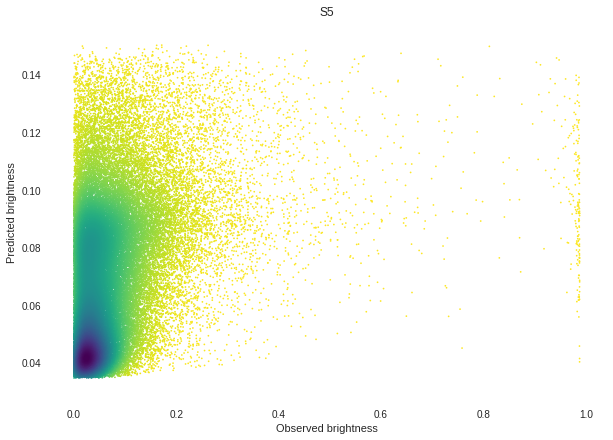

In [20]:
plt.figure(figsize = [10,7])
density_plot(true2, predicted2, chunk)

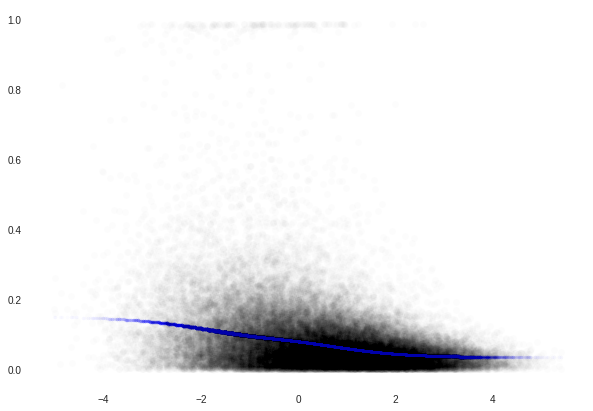

In [21]:
plt.figure(figsize = [10,7])
plt.plot(fitness_potential2, true2, 'ok', alpha = 0.01)
plt.plot(fitness_potential2, predicted2, '.b', alpha = 0.01);

In [22]:
_, _, r_value, _, _ = stats.linregress(true2,predicted2)
r_value

0.31375707004183229

### 3. Checking improvement

In [84]:
predicted1[idx] = predicted2
_, _, r_value, _, _ = stats.linregress(true1, predicted1)
r_value

/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
  if __name__ == '__main__':


0.71763838897884835

### 4. Sign epistasis in residuals